Название проекта: Исследование объявлений о продаже квартир

Описание исследования: на основе архива объявлений о продаже квартир необходимо выявить критерии, которые позволят отследить аномалии в продаже квартир и мошенническую деятельность.

Цель исследования: установить параметры для определения рыночной стоимости объектов недвижимости

Суть исследования: научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

Задачи исследования:
заполнить пропуски там, где это важно для исследования

перевести данные в  необходимые для исследования форматы

дополнить данные соответствующими таблицами с разными показателями (месяц, день, год, цена за метр и т.д.) необходимыми для исследования

провести исследовательский анализ данных и выявить значимые корреляции

выявить средние показатели для продаваемой квартиры, чтобы определить, что будет являться аномалией

Исходные данные: архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. По каждой квартире на продажу доступны два вида данных, вписанные пользователем и полученные автоматически. 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

## Изучение данных из файла

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.info()
display(data)
display(data.describe())
print('процент пропусков в столбце "airports_nearest"', data['airports_nearest'].isna().sum()/ len(data)*100)
print('процент пропусков в столбце "ceiling_height"', data['ceiling_height'].isna().sum()/ len(data)*100) 
print('процент пропусков в столбце "kitchen_area"', data['kitchen_area'].isna().sum()/ len(data)*100) 
print('процент пропусков в столбце "cityCenters_nearest"', data['cityCenters_nearest'].isna().sum()/ len(data)*100) 
print('процент пропусков в столбце "balcony"', data['balcony'].isna().sum()/ len(data)*100)       
print('процент пропусков в столбце "living_area"', data['living_area'].isna().sum()/ len(data)*100) 
print('процент пропусков в столбце "floors_total"', data['floors_total'].isna().sum()/ len(data)*100)       
print('процент пропусков в столбце "is_apartment"', data['is_apartment'].isna().sum()/ len(data)*100)       
print('процент пропусков в столбце "days_exposition"', data['days_exposition'].isna().sum()/ len(data)*100)    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


процент пропусков в столбце "airports_nearest" 23.384952951601335
процент пропусков в столбце "ceiling_height" 38.799105447487236
процент пропусков в столбце "kitchen_area" 9.612219924891345
процент пропусков в столбце "cityCenters_nearest" 23.28790244314106
процент пропусков в столбце "balcony" 48.605426389299126
процент пропусков в столбце "living_area" 8.029874678256467
процент пропусков в столбце "floors_total" 0.36288450989493226
процент пропусков в столбце "is_apartment" 88.2906451749019
процент пропусков в столбце "days_exposition" 13.422507278788135


### Вывод
Данные были представлены в одном столбце через слеш, для корректной работы с ними необходимо было скорректировать разделитель. На первый взгляд пропуски значений присутствуют в следующих столбцах: ceiling_height, living_area,  is_apartment, kitchen_area, balcony, airports_nearest, cityCenters_nearest, parks_around3000, ponds_nearest, days_exposition.

ceiling_height: было пропущено 38,8% значений, при этом часть значений были введены вручную с ошибкой (27 м вместо 2,7 м и т.д.). 

floors_total: пропущено 0,4% значений. Данный признак будет использоваться в анализе, при этом достаточно точно заменить пропущенные значения не представляется возможным, поэтому все строки с пропущенными значениями удалены.

living_area и kitchen_area: пропущено 7,9% и 9,4% значений соответственно.

balcony: пропущено 48,6% значений. Предполагается, что отсутствие числа балконов свидетельствует о том, что балкона нет, заменим на ноль.

locality_name: пропущено 0,2% значений. Все строки с пропущенными значениями удалены, так как этот признак будет использоваться при дальнейшем анализе.

cityCenters_nearest: пропущено 23,3% значений. При этом из всех квартир Санкт-Петербурга отсутствует информация по расстоянию до центра для 0,4% квартир.

is_apartment все пропуски можно было бы заполнить False, так как скорее всего не заполнили эту графу те люди, которые не считали свою квартиру апартаментами, поэтому и пропустили. Однако, пропусков очень много, 88,3%, а в исследовании не исспользуется этот показатель, можно оставить так. 

airports_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest: пропущенные значения в этих признаках оставим без изменений, так как они не будут использованы в текущем исследовании.

days_exposition: пропущено 13,5% значений. Все пропущенные значения заменить на медиану - не самое лучшее решение, так как причина не заполнения этого значения неясна, возможно, квартира до сих пор не продана, а попала в эту базу.

## Предобработка данных
 'floors_total' и 'balcony' нужны целые числа, так как не бывает в таких категориях дробных. В других столбцах для удобства подсчетов, тоже приведем к целым числами для 'last_price',  'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition'
В двух столбцах 'ceiling_height' и 'kitchen_area' явно некоторые данные противоречат действительности, как кухня меньше метра или больше 25, так и потолок больше 3,5 метров. Такие данные были увеличены или уменьшены в 10 раз соответственно. 

In [2]:
list_for_int = ['last_price', 'floors_total', 'balcony', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000',
               'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition']
for column in list_for_int:
    data[column] = data.loc[data[column].notnull(), column].astype('int')
list_for_float_1 = ['total_area', 'ceiling_height', 'living_area', 'kitchen_area']
for column in list_for_float_1:
    data[column] = data[data[column].notnull()][column].round(1)
 
#for column in data:
    #print('процент пропусков в data[column]', format(data[column].isna().value_counts()[1] / len(data)))    
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.0,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,...,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,...,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000,71.6,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000,33.2,2018-05-23T00:00:00,1,NaN,27.0,15.4,26,NaN,...,8.8,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000,61.0,2017-02-26T00:00:00,3,2.5,9.0,43.6,7,NaN,...,6.5,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.isna().sum()
data.duplicated().sum()
data['balcony'] = data['balcony'].fillna(0)
data['ceiling_height'].unique()
ceiling_medians = data.pivot_table(index='floors_total', values='ceiling_height', aggfunc=['median', 'count'])
ceiling_medians.columns = ['median', 'count']
print(ceiling_medians.head())
#data.loc[(data['ceiling_height'] <101)& (data['ceiling_height'] >=25),'ceiling_height'] = data.loc[(data['ceiling_height'] <101) 
         #& (data['ceiling_height'] >=25),'ceiling_height']/10
median_ceiling_height = data.loc[(data['ceiling_height'] <4)& (data['ceiling_height'] >=2),'ceiling_height'].median()
data['ceiling_height']= data['ceiling_height'].fillna(median_ceiling_height)
data.loc[(data['ceiling_height'] <2.5)& (data['ceiling_height'] >=5),'ceiling_height'] = data.loc[(data['ceiling_height'] <2.5) 
         & (data['ceiling_height'] >=5),'ceiling_height'].replace(median_ceiling_height)
data['ceiling_height'].sort_values().unique()

              median  count
floors_total               
1.0              2.8     10
2.0              2.7    215
3.0              2.8    399
4.0              3.0    789
5.0              2.6   3666


array([  1. ,   1.2,   1.8,   2. ,   2.2,   2.3,   2.4,   2.5,   2.6,
         2.7,   2.8,   2.9,   3. ,   3.1,   3.2,   3.3,   3.4,   3.5,
         3.6,   3.7,   3.8,   3.9,   4. ,   4.1,   4.2,   4.3,   4.4,
         4.5,   4.6,   4.7,   4.8,   4.9,   5. ,   5.2,   5.3,   5.5,
         5.6,   5.8,   6. ,   8. ,   8.3,  10.3,  14. ,  20. ,  22.6,
        24. ,  25. ,  26. ,  27. ,  27.5,  32. , 100. ])

balcony: в этом столбце все отсутствующие значения заменили на ноль, так как пропуск значит, что балкона, скорее всего нет.
kitchen_area: в этом столбце меняем пропуски в квартирах со студиями на 0, все площади меньше 1 умножаем на 10, а 
ceiling_height: Поскольку высота потолков не может быть двузначной величиной, а также меньше 2,5 м, то все значения больше 25 м были разделены на 10. Поскольку в данных существуют значения в 1,75 м и даже в 1 м, то заменим их и те, которые больше 5 м. на медиану. 

In [4]:
#data['is_apartment'].unique()
data['kitchen_area'].value_counts().tail(30)
kitchen_medians = data.pivot_table(index='floors_total', values='kitchen_area', aggfunc=['median', 'count'])
kitchen_medians.columns = ['median', 'count']
print(kitchen_medians.head())
median_kitchen = data['kitchen_area'].median()
print(median_kitchen)
#data.loc[(data['studio'] == True), 'kitchen_area'] = data.loc[(data['studio'] == True), 'kitchen_area'].fillna(0)
data.loc[(data['kitchen_area'] <1) & (data['kitchen_area'] >=25),'kitchen_area'] = data.loc[(data['kitchen_area'] <1) 
    & (data['kitchen_area'] >=25),'kitchen_area'].replace(median_kitchen)
     
data['kitchen_area'].sort_values().value_counts()

              median  count
floors_total               
1.0              9.1     19
2.0              7.0    349
3.0              8.5    593
4.0              9.8   1078
5.0              7.0   5262
9.1


6.0     1302
10.0    1280
8.0     1118
9.0     1109
7.0     1066
        ... 
49.4       1
27.3       1
3.4        1
32.9       1
43.2       1
Name: kitchen_area, Length: 398, dtype: int64

In [5]:
#for index in data:
    #if data['kitchen_area'][index] + data['living_area'][index] >= data['total_area'][index]:
        #print(index)    
    #else:
        

In [6]:
#data['locality_name'] = data['locality_name'].str.replace('поселок', '') 
data['locality_name'].unique()
data['locality_name'] = data['locality_name'].replace('посёлок', 'поселок', regex=True) 
print(data['airports_nearest'].isna().sum())
#atlas=[['Кировск', 47000, 52200], ['Приозерск', 173800, 160700], ['Волосово', 69640.7, 90500], ['Бокситогорск', 256300, 266700], 
   #['Сертолово', 48370, 38300], ['Кингисепп', 126900, 130500], ['Коммунар', 38900, 52800], ['Гатчина', 30700, 44600],
   #['Тосно', 50300, 56600], ['Всеволожск', 47100, 24800], ['Волхов', 132300, 142600], ['Кириши', 153900, 167000],
   #['Выборг', 154200, 135600], ['Луга', 130800, 144700], ['Кудрово', 25500, 16100], ['Мурино', 42400, 18600],
   #['Ивангород', 150700, 154200], ['Сясьстрой', 144500, 154900], ['Шлиссельбург', 56300, 66700],     
   #['Приморск', 150400, 131700], ['Подпорожье', 280300], ['Пикалёво', 267700, 278100], ['Отрадное', 43100, 43600],
   #['Сосновый Бор', 94300, 97800], ['Высоцк', 177900, 159300], ['Никольское', 39400, 52400],
   #['Тихвин', 225400, 235800], ['Новая Ладога', 133100, 143500], ['Сланцы', 181700, 185300],
   #['Каменногорск', 193400, 174800], ['Лодейное Поле', 238800, 244200],
   #['деревня Тихковицы', 54700, 68700], ['деревня Сяськелево', 54800, 68700], ['деревня Старая Пустошь', 41600, 32100],
   #['деревня Разметелево', 31200, 30000], ['деревня Рабитицы', 84300, 98200], ['деревня Пудомяги', 34200, 48200],
   #['деревня Пеники', 55300, 58900], ['деревня Низино', 37500, 41000], ['деревня Нижняя', 35600, 35500],
   #['деревня Ненимяки', 88900, 69000], ['деревня Мистолово', 55500, 42400], ['деревня Малое Карлино', 15100, 29000], 
   #['деревня Малое Верево', 15500, 39400], ['деревня Лопухинка', 72100, 75700], ['деревня Лампово', 74200, 88100],
   #['деревня Коркино', 39400, 30000], ['деревня Колтуши', 35700, 21700], ['деревня Кипень', 41400, 45000],
   #['деревня Келози', 42200, 45800], ['деревня Кальтино', 40900, 31600], ['деревня Иссад', 131300, 141700],
   #['деревня Извара', 88200, 102100], ['деревня Заневка', 30100, 18000], ['деревня Гостилицы', 57800, 61300],
   #['деревня Горбунки', 30700, 34300], ['деревня Гарболово', 90900, 70900], ['деревня Вартемяги', 62200, 42200],
   #['деревня Борисова Грива', 73600, 48100], ['деревня Большие Колпаны', 43300, 57200], ['деревня Белогорка', 58700, 72600],
   #['деревня Батово', 67800, 81800], ['деревня Аро', 34400, 33400], ['деревня Агалатово', 69100, 49200],
   #['деревня Кудрово', 25500, 16100], ['деревня Фёдоровское', 44300, 37600], ['деревня Заклинье', 132700, 146600],
   #['деревня Оржицы', 54600, 58200], ['деревня Новое Девяткино', 44900, 21100], ['деревня Старая', 34500, 23900],
   #['деревня Куттузи', 24800, 28300], ['деревня Бегуницы', 78400, 82000], ['деревня Оржицы', 54600, 58200],
   #['деревня Пикколово', 29800, 33400], ['деревня Яльгелево', 46700, 50300], ['деревня Лесколово', 73100, 53200], 
   #['деревня Нурма', 59200, 65500], ['деревня Лаголово', 30500, 34100], ['деревня Разметелево', 31200, 30000],
   #['село Копорье', 97400, 100900], ['село Павлово', 36900, 22800], ['село Рождествено', 63700, 77600],    
   #['село Путилово', 78300, 88700], ['село Паша', 183200, 193500], ['садовое товарищество Новая Ропша', 38900, 42500], 
   #['городской поселок Янино-1', 29700, 19100], ['поселок городского типа Кузьмоловский', 51600, 27800],
   #['поселок городского типа Сиверский', 61100, 75000], ['поселок городского типа Лебяжье', 68000, 71500],
   #['поселок Мурино', 42400, 18600], ['поселок Новый Учхоз', 52200, 66100], ['поселок Молодцово', 65300, 75700],   
   #['поселок городского типа Красный Бор', 32900, 46000], ['поселок городского типа Тайцы', 33500, 36700],
   #['поселок городского типа Ефимовский', 305000, 315400], ['поселок городского типа Приладожский', 74800, 85200],
   #['поселок Плодовое', 154200, 141100], ['поселок Возрождение', 175800, 157100], ['поселок Оредеж', 162300, 176200],
   #['поселок Торковичи', 145200, 159100], ['поселок Бугры', 48000, 18600], ['поселок Тельмана', 29500, 35900],
   #['поселок Аннино', 23600, 27200], ['поселок Романовка', 51200, 28900], ['поселок Новый Свет', 33600, 47500], 
   #['поселок Первомайское', 85200, 66600],  ['поселок городского типа Токсово', 56700, 32900], 
   #['поселок городского типа Рощино', 92300, 73600], ['городской поселок Большая Ижора', 59400, 62800], 
   #['поселок городского типа имени Свердлова', 30100, 40500], ['поселок городского типа Вырица', 55800, 69700],
   #['поселок Елизаветино', 60200, 74200], ['городской поселок Лесогорский', 195700, 177000], 
   #['поселок Щеглово', 54200, 31900], ['поселок Шушары', 10500, 16800], ['поселок Цвелодубово', 97600, 78900],
   #['поселок Терволово', 43000, 46500], ['поселок Суходолье', 131200, 118100], ['поселок станции Корнево', 53400, 31200],
   #['поселок станции Вещево', 146300, 126000], ['поселок Сосново', 113000, 92100], ['поселок Сельцо', 59300, 68600],
   #['поселок Севастьяново', 175300, 162200], ['поселок Рябово', 129200, 82500], ['поселок Пчевжа', 176900, 189900],
   #['поселок Поляны', 112100, 93400], ['поселок Победа', 99400, 88400], ['поселок Петровское', 120800, 100900],
   #['поселок Перово', 145900, 127300], ['поселок Новогорелово', 18400, 22000], ['поселок Мичуринское', 128400, 108400],
   #['поселок Любань', 83800, 90200], ['поселок Кобралово', 42200, 56100],['коттеджный поселок Лесное', 87700, 67700],
   #['поселок Ильичёво', 80100, 61400], ['поселок Зимитицы', 90900, 88800], ['поселок Запорожское', 128200, 108300],
   #['поселок Заводской', 93100, 73100], ['поселок Дружноселье', 71000, 84900], ['поселок Дзержинского', 139400, 153300],
   #['поселок Громово', 142200, 129100], ['поселок Глебычево', 151700, 133100], ['поселок Володарское', 158500, 172400],
   #['поселок Барышево', 140200, 121500], ['поселок городского типа Советский', 160300, 141700], 
   #['поселок городского типа Синявино', 53400, 52400], ['поселок городского типа Рахья', 62600, 40000],
   #['поселок городского типа Никольский', 294000, 304300], ['поселок городского типа Кузнечное', 193600, 180500],
   #['поселок городского типа имени Морозова', 57000, 63500], ['городской поселок Фёдоровское', 28000, 45000],
   #['городской поселок Павлово', 63700, 62800], ['городской поселок Новоселье', 22300, 25800],
   #['городской поселок Мга', 66200, 84300]
   #] 
#geography = ['locality_name', 'airports_nearest', 'cityCenters_nearest']
#cities_map = pd.DataFrame(data=atlas, columns=geography) 
#display(cities_map.head(10))
#cities_map = pd.DataFrame(data=atlas, columns=geography).set_index("locality_name")
#cityCenters_nearest_dict = cities_map['cityCenters_nearest'].to_dict()
#airports_nearest_dict = cities_map['airports_nearest'].to_dict()

#cityCenters_nearest_dict = dict(pd.Series(cities_map['cityCenters_nearest'].values,
                                #index=cities_map['locality_name'].values))
#airports_nearest_dict = dict(pd.Series(cities_map['airports_nearest'].values,
                                #index=cities_map['locality_name'].values))
#data.loc[data['cityCenters_nearest'].isnull(), 'cityCenters_nearest'] = data['locality_name'].map(cityCenters_nearest_dict)
#data.loc[data['airports_nearest'].isnull(), 'airports_nearest'] = data['locality_name'].map(airports_nearest_dict)
#display(data[data['locality_name'] != 'Санкт-Петербург'][['locality_name', 'cityCenters_nearest', 'airports_nearest']].head(60))
#print(data['airports_nearest'].isna().sum()) 
#list_of_cities_NaN = data.query('airports_nearest != airports_nearest and cityCenters_nearest != cityCenters_nearest')['locality_name'].unique()
#print(list_of_cities_NaN)
#data['airports_nearest']=hash(data['airports_nearest'])
#data['airports_nearest']= pd.to_numeric(data.airports_nearest)
#data['airports_nearest']=round(data['airports_nearest'])
#data['cityCenters_nearest']= pd.to_numeric(data.cityCenters_nearest)
#data['cityCenters_nearest']=round(data['cityCenters_nearest']) 
#data['locality_name'].duplicated().sum()


5542


Вывод: Поскольку большинство пропущенных значений в столбцах data['airports_nearest'] и data['cityCenters_nearest'] приходятся на разные селения Ленинградской области, а по дальнейшему заданию данные столбца data['cityCenters_nearest'] понадобятся в отношении только Санкт-Петербурга, то заполнением этих пропусков можно пренебречь и оставить эти данные без анализа. Поэтому, я скорректировала код, чтобы данные при обработки не менялись на object и закомментировала его, чтобы скорость обработки далее былa быстрее

In [7]:
#data['days_exposition'].unique()
#print(data['days_exposition'].value_counts())
#data['days_exposition'] = data['days_exposition'].fillna(data['days_exposition'].median())
data['floors_total'] = data[data['floors_total'].notnull()]['floors_total'].astype('int')
data['floors_total'] = round(data['floors_total'])
print(data['floors_total'].value_counts())
#data['total_images'].unique()
print(data['rooms'].value_counts())
#data['ponds_around3000'].unique()
#data['ponds_nearest'].value_counts()
#data = data.drop_duplicates().reset_index(drop=True)
#data['first_day_exposition'].value_counts()
data.info()
#data['studio'].sort_values().unique()

5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      390
2.0      383
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
37.0       1
34.0       1
33.0       1
60.0       1
29.0       1
52.0       1
Name: floors_total, dtype: int64
1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price         

Вывод: больше всего квартир продается в 5-этажных домах, следующие по частоте продаж квартиры в 9-ти и в 16-ти этажных домах.




## Расчёты и добавление результатов в таблицу
Для удобства дальнейшего анализа в таблицу были добавлены: цена квадратного метра; день недели, месяц и год публикации объявления; этаж квартиры в обобщенном виде; соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [8]:
data['price_of_metre'] = data['last_price']/data['total_area']
data['price_of_metre'] = round(data['price_of_metre'])

def floor_type(row):
    if row['floor'] == 1:
        return 'первый' 
    elif row['floor'] == row['floors_total']:
        return 'последний' 
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_type, axis=1)
data['living_total'] = data['living_area']/data['total_area']
data['kitchen_total'] = data['kitchen_area']/data['total_area']

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],format = '%Y-%m-%dT%H:%M:%S', errors='coerce')
data['first_day_exposition'].isna().value_counts()
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year
data['weekday'] = data['first_day_exposition'].dt.weekday

#data['month'] = data['month'].fillna(0)

for day in data['weekday']:
    if day ==0:
        data['weekday']= data['weekday'].replace(0, 'понедельник')
    elif day ==1:
        data['weekday']=data['weekday'].replace(1, 'вторник')
    elif day ==2:
        data['weekday']=data['weekday'].replace(2, 'cреда')
    elif day ==3:
        data['weekday']=data['weekday'].replace(3, 'четверг')
    elif day ==4:
        data['weekday']=data['weekday'].replace(4, 'пятница')
    elif day ==5:
        data['weekday']=data['weekday'].replace(5, 'суббота')
    else:
        data['weekday']=data['weekday'].replace(6, 'воскресение')    
data['first_day_exposition'] = data['first_day_exposition'].dt.to_period('D').dt.to_timestamp()
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_of_metre,floor_type,living_total,kitchen_total,month,year,weekday
0,20,13000000,108.0,2019-03-07,3,2.7,16.0,51.0,8,NaN,...,2.0,755.0,NaN,120370.0,другой,0.472222,0.231481,3,2019,четверг
1,7,3350000,40.4,2018-12-04,1,2.6,11.0,18.6,1,NaN,...,0.0,NaN,81.0,82921.0,первый,0.460396,0.272277,12,2018,вторник
2,10,5196000,56.0,2015-08-20,2,2.6,5.0,34.3,4,NaN,...,2.0,574.0,558.0,92786.0,другой,0.612500,0.148214,8,2015,четверг
3,0,64900000,159.0,2015-07-24,3,2.6,14.0,NaN,9,NaN,...,3.0,234.0,424.0,408176.0,другой,NaN,NaN,7,2015,пятница
4,2,10000000,100.0,2018-06-19,2,3.0,14.0,32.0,13,NaN,...,1.0,48.0,121.0,100000.0,другой,0.320000,0.410000,6,2018,вторник
5,10,2890000,30.4,2018-09-10,1,2.6,12.0,14.4,5,NaN,...,NaN,NaN,55.0,95066.0,другой,0.473684,0.299342,9,2018,понедельник
6,6,3700000,37.3,2017-11-02,1,2.6,26.0,10.6,6,NaN,...,0.0,NaN,155.0,99196.0,другой,0.284182,0.386059,11,2017,четверг
7,5,7915000,71.6,2019-04-18,2,2.6,24.0,NaN,22,NaN,...,0.0,NaN,NaN,110545.0,другой,NaN,0.263966,4,2019,четверг
8,20,2900000,33.2,2018-05-23,1,2.6,27.0,15.4,26,NaN,...,NaN,NaN,189.0,87349.0,другой,0.463855,0.265060,5,2018,cреда
9,18,5400000,61.0,2017-02-26,3,2.5,9.0,43.6,7,NaN,...,0.0,NaN,289.0,88525.0,другой,0.714754,0.106557,2,2017,воскресение


## Исследовательский анализ данных
    Изучила параметры: площадь, цена, число комнат, высота потолков и построила для них гистограммы.
    
    

,total_area,last_price,rooms,ceiling_height,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,20518.000000
mean,60.348635,6.541549e+06,2.070636,2.707540,180.888634
std,35.654086,1.088701e+07,1.078405,0.990151,219.727988
min,12.000000,1.219000e+04,0.000000,1.000000,1.000000
25%,40.000000,3.400000e+06,1.000000,2.600000,45.000000
50%,52.000000,4.650000e+06,2.000000,2.600000,95.000000
75%,69.900000,6.800000e+06,3.000000,2.700000,232.000000
max,900.000000,7.630000e+08,19.000000,100.000000,1580.000000


45.0    420
42.0    385
44.0    349
60.0    348
31.0    346
40.0    315
43.0    306
36.0    291
32.0    290
46.0    285
Name: total_area, dtype: int64
110.8    1
154.8    1
111.8    1
185.8    1
216.0    1
21.1     1
347.0    1
218.0    1
151.5    1
242.4    1
Name: total_area, dtype: int64


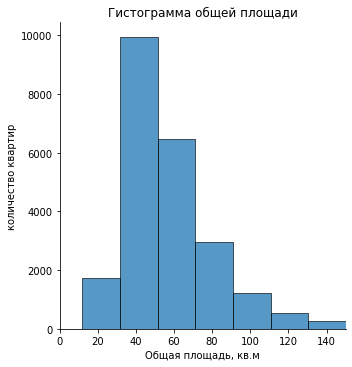

In [9]:
display(data[['total_area', 'last_price', 'rooms', 'ceiling_height', 'days_exposition']].describe())
print(data['total_area'].value_counts().head(10))
print(data['total_area'].value_counts().tail(10))
sns.displot(data['total_area'], kde=False, bins=45)
plt.xlim(0, 150)
plt.title('Гистограмма общей площади')
plt.xlabel('Общая площадь, кв.м')
plt.ylabel('количество квартир')
plt.show()

Вывод: Средняя площадь квартир около 60 м2, 

4500000     342
3500000     291
4000000     260
4300000     260
4200000     259
           ... 
1320000       1
19150000      1
6649000       1
10296437      1
11615600      1
Name: last_price, Length: 2978, dtype: int64


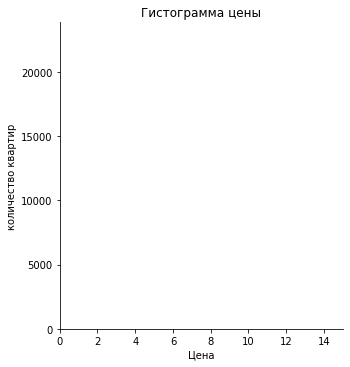

In [10]:
print(data['last_price'].value_counts())
sns.displot(data['last_price'], kde=False, bins=45)
plt.xlim(0, 15)
plt.title('Гистограмма цены')
plt.xlabel('Цена')
plt.ylabel('количество квартир')
plt.show()
#print(data[last_price].hist(bins=50, figsize=(10,5), ec='black'))

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


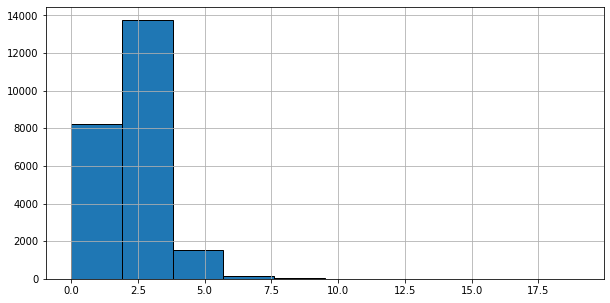

In [11]:
print(data['rooms'].value_counts())
print(data['rooms'].hist(range=(0,19), figsize=(10,5), ec='black'))

Больше всего квартир с 2-х и 3-х комнатные, следующие однокомнатные, но есть и больше 5 комнат 

2.6      12929
2.5       3792
2.8       2247
2.7       1759
3.0       1241
3.2        407
3.1        285
2.9        213
3.3        182
3.5        157
3.4        138
3.6         73
4.0         48
2.4         38
3.7         38
3.8         37
3.9         19
4.2         14
2.0         11
27.0         8
25.0         7
4.5          7
4.4          6
2.3          5
4.1          5
8.0          3
32.0         2
4.7          2
2.2          2
5.3          2
10.3         1
8.3          1
5.8          1
4.9          1
1.0          1
5.6          1
20.0         1
5.2          1
5.0          1
26.0         1
4.3          1
4.8          1
27.5         1
6.0          1
22.6         1
14.0         1
24.0         1
1.8          1
100.0        1
5.5          1
4.6          1
1.2          1
Name: ceiling_height, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


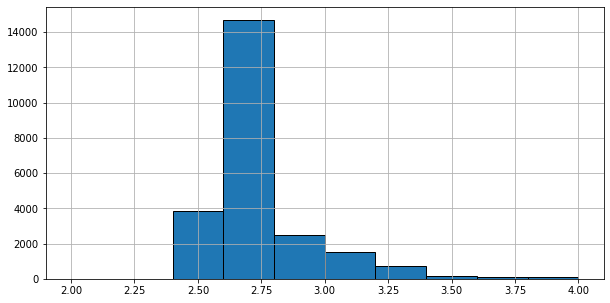

In [12]:
print(data['ceiling_height'].value_counts())
print(data['ceiling_height'].hist(range=(2,4), figsize=(10,5), ec='black'))

Большая часть квартир с потолком 2,5 метров, но есть и квартиры с потолком 3, 3,5 и 4 метра.

## Построила гистограмму времени продажи квартиры и проанализировала основные показатели, чтобы описать сколько времени обычно она занимает
    
    

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

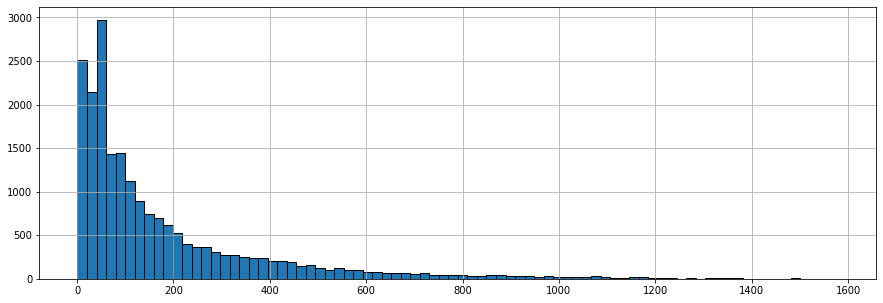

In [13]:
display(data['days_exposition'].describe())
data['days_exposition'].hist(bins=80, figsize=(15,5), ec='black')

Вывод: Обычно продажа занимает около 95 дней. Продажи проходят быстро, если занимают меньше, чем 45 дней, а медленно, если больше 232 дня. 

## Убрала редкие и выбивающиеся значения, чтобы четче выявить те особенности, которые наблюдаются при анализе предоставленных данных.    

In [14]:
display(data.describe())

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_of_metre,living_total,kitchen_total,month,year
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23613.000000,21796.000000,23699.000000,21421.000000,23699.000000,...,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000,2.369900e+04,21796.000000,21421.000000,23699.000000,23699.000000
mean,9.858475,6.541549e+06,60.348635,2.070636,2.707540,10.673824,34.457878,5.892358,10.569754,0.591080,...,0.611408,490.804555,0.770255,517.980900,180.888634,9.942169e+04,0.564766,0.187354,6.400101,2017.367146
std,5.682529,1.088701e+07,35.654086,1.078405,0.990151,6.597173,22.030420,4.885249,5.905448,0.959298,...,0.802074,342.317995,0.938346,277.720643,219.727988,5.030699e+04,0.105368,0.072967,3.491561,1.039771
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,...,0.000000,1.000000,0.000000,13.000000,1.000000,1.120000e+02,0.021583,0.025381,1.000000,2014.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,...,0.000000,288.000000,0.000000,294.000000,45.000000,7.658700e+04,0.495201,0.133333,3.000000,2017.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.600000,9.000000,30.000000,4.000000,9.100000,0.000000,...,0.000000,455.000000,1.000000,502.000000,95.000000,9.500000e+04,0.567914,0.172414,6.000000,2017.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.700000,16.000000,42.300000,8.000000,12.000000,1.000000,...,1.000000,612.000000,1.000000,729.000000,232.000000,1.142620e+05,0.637830,0.232432,10.000000,2018.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,...,3.000000,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,1.000000,0.787879,12.000000,2019.000000


Вывод: Средняя квартира, выставленная на продажу, имеет следующие характеристики: это 2-комнатная квартира площадью 52 кв. м с потолками 2,65 м, проданная за 3 месяцa (95 дней) по цене 4,7 млн рублей.

<AxesSubplot:>

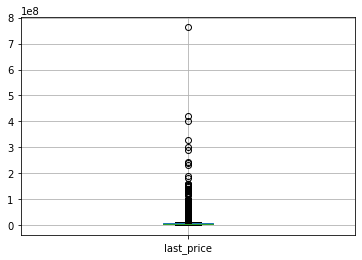

In [15]:
data.boxplot(column='last_price')

<AxesSubplot:>

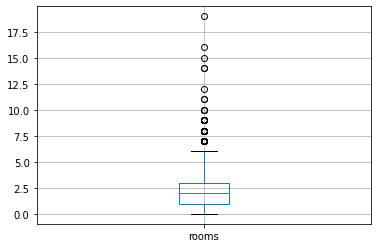

In [16]:
data.boxplot(column='rooms')

<AxesSubplot:>

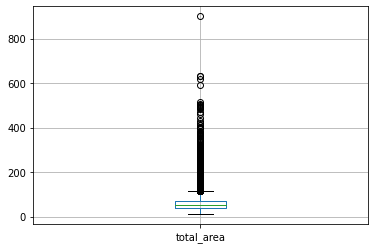

In [17]:
data.boxplot(column='total_area')

<AxesSubplot:>

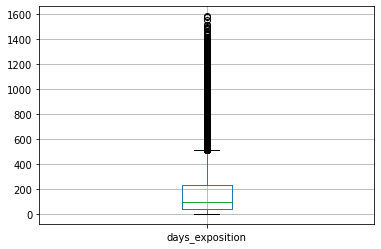

In [18]:
data.boxplot(column='days_exposition')

In [19]:
good_data_last_price = data.loc[data['last_price'] < 14000000]
good_data_days = good_data_last_price.loc[(data['days_exposition']>45) & (data['days_exposition']<232)]
good_data_rooms = good_data_days.loc[data['rooms'] < 6]
good_data_area = good_data_rooms.loc[(data['total_area']>25) & (data['total_area'] < 70)]
good_data = good_data_area.loc[(data['ceiling_height']>2.5) & (data['ceiling_height']<3.05)]
display(good_data)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_of_metre,floor_type,living_total,kitchen_total,month,year,weekday
1,7,3350000,40.4,2018-12-04,1,2.6,11.0,18.6,1,NaN,...,0.0,NaN,81.0,82921.0,первый,0.460396,0.272277,12,2018,вторник
5,10,2890000,30.4,2018-09-10,1,2.6,12.0,14.4,5,NaN,...,NaN,NaN,55.0,95066.0,другой,0.473684,0.299342,9,2018,понедельник
6,6,3700000,37.3,2017-11-02,1,2.6,26.0,10.6,6,NaN,...,0.0,NaN,155.0,99196.0,другой,0.284182,0.386059,11,2017,четверг
8,20,2900000,33.2,2018-05-23,1,2.6,27.0,15.4,26,NaN,...,NaN,NaN,189.0,87349.0,другой,0.463855,0.265060,5,2018,cреда
10,5,5050000,39.6,2017-11-16,1,2.7,12.0,20.3,3,NaN,...,2.0,553.0,137.0,127525.0,другой,0.512626,0.214646,11,2017,четверг
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23665,11,4250000,47.0,2016-05-20,1,2.6,6.0,18.2,1,False,...,1.0,519.0,131.0,90426.0,первый,0.387234,0.310638,5,2016,пятница
23668,13,6000000,47.0,2018-03-16,2,3.0,5.0,27.0,4,NaN,...,0.0,NaN,157.0,127660.0,другой,0.574468,0.191489,3,2018,пятница
23669,8,3000000,34.1,2017-11-10,1,2.6,9.0,17.0,3,NaN,...,1.0,741.0,74.0,87977.0,другой,0.498534,0.263930,11,2017,пятница
23676,19,3550000,36.4,2016-06-08,1,2.6,16.0,14.9,13,NaN,...,0.0,NaN,70.0,97527.0,другой,0.409341,0.255495,6,2016,cреда


Выбивающиеся значения характеристик квартир из представленного набора данных:

7-комнатная квартира или больше

площадью более 114,3 кв. м

с потолками менее 2,25 м или более 3,05 м

по цене более 11,9 млн рублей

проданная за 232 дня (?)  или более

## Исследование влияния разных типов данных на скорость продажи квартиры

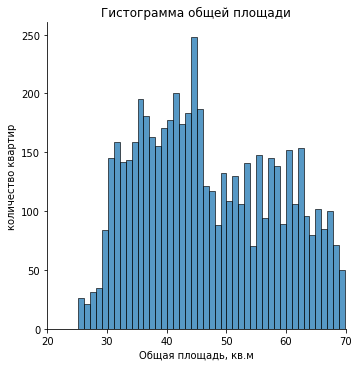

корреляция между площадью квартиры и ее стоимостью 0.65


In [20]:
# Построим диаграмму для объектов с площадью менее 150 кв.м.
sns.displot(good_data['total_area'], kde=False, bins=45)
plt.xlim(20, 70)
plt.title('Гистограмма общей площади')
plt.xlabel('Общая площадь, кв.м')
plt.ylabel('количество квартир')
plt.show()
print('корреляция между площадью квартиры и ее стоимостью', str(round(data['last_price'].corr(data['total_area']), 2)))
#print('корреляция между расстоянием от центра города и ее стоимостью', str(round(data['last_price'].corr(data['cityCenters_nearest']), 2)))

Вывод. Факторы, влияющие на стоимость квартиры
Наиболее сильная корреляция наблюдается между площадью квартиры и ее стоимостью (коэфф. корреляции 0,65).
Расстояние до центра города влияет на стоимость квартиры, но обратно пропорционально и не так сильно (коэфф. корреляции -0,31).

для 1-комнатной квартиры
count    2.620000e+03
mean     3.876784e+06
std      1.400120e+06
min      4.500000e+05
25%      3.030000e+06
50%      3.692500e+06
75%      4.500000e+06
max      1.200000e+07
Name: last_price, dtype: float64
для 2-комнатной квартиры
count    2.275000e+03
mean     4.929882e+06
std      1.895387e+06
min      4.500000e+05
25%      3.799000e+06
50%      4.750000e+06
75%      6.000000e+06
max      1.369000e+07
Name: last_price, dtype: float64
для 3-комнатной квартиры
count    6.310000e+02
mean     4.935232e+06
std      1.643273e+06
min      8.500000e+05
25%      4.075000e+06
50%      5.000000e+06
75%      5.870000e+06
max      1.200000e+07
Name: last_price, dtype: float64
для 4-комнатной квартиры
count    3.100000e+01
mean     3.790065e+06
std      1.073419e+06
min      9.990000e+05
25%      3.450000e+06
50%      3.650000e+06
75%      4.125000e+06
max      6.925000e+06
Name: last_price, dtype: float64
для 5-комнатной квартиры
count    3.000000e+00
mean     3.783333

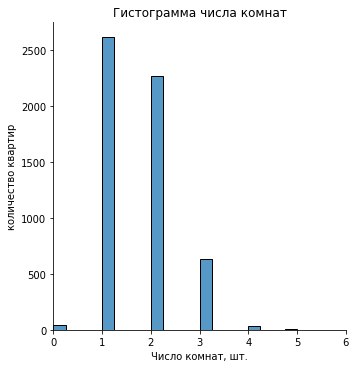

In [21]:
print('для 1-комнатной квартиры')
print(good_data.query('rooms==1')['last_price'].describe())
print('для 2-комнатной квартиры')
print(good_data.query('rooms==2')['last_price'].describe())
print('для 3-комнатной квартиры')
print(good_data.query('rooms==3')['last_price'].describe())
print('для 4-комнатной квартиры')
print(good_data.query('rooms==4')['last_price'].describe())
print('для 5-комнатной квартиры')
print(good_data.query('rooms==5')['last_price'].describe())
print('для 6-комнатной квартиры')
print(good_data.query('rooms==6')['last_price'].describe())

sns.displot(good_data['rooms'], kde=False, bins=20)
plt.xlim(0, 6)
plt.title('Гистограмма числа комнат')
plt.xlabel('Число комнат, шт.')
_ = plt.ylabel('количество квартир')

Стоимость квартиры зависит от числа комнат: чем их больше, тем квартира дороже. 

Но это верно, пока число комнат не превышает четырех: 5- или 6-комнатные квартиры могут быть проданы дешевле 4-комнатных, и вызвано это скорее всего отсутствием спроса.

In [22]:
print('для цены на первом этаже')
print(good_data.query('floor_type == "первый"')['last_price'].describe())
print('для цены на последнем этаже')
print(good_data.query('floor_type == "последний"')['last_price'].describe())
print('для цены на другом этаже')
print(good_data.query('floor_type == "другой"')['last_price'].describe())

для цены на первом этаже
count    6.560000e+02
mean     3.714501e+06
std      1.661930e+06
min      4.800000e+05
25%      2.650000e+06
50%      3.585000e+06
75%      4.657500e+06
max      1.330000e+07
Name: last_price, dtype: float64
для цены на последнем этаже
count    6.790000e+02
mean     3.986547e+06
std      1.869099e+06
min      5.600000e+05
25%      2.700000e+06
50%      3.800000e+06
75%      4.934940e+06
max      1.200000e+07
Name: last_price, dtype: float64
для цены на другом этаже
count    4.268000e+03
mean     4.592529e+06
std      1.673766e+06
min      4.500000e+05
25%      3.466150e+06
50%      4.390000e+06
75%      5.499000e+06
max      1.369000e+07
Name: last_price, dtype: float64


Квартиры на первом или последнем этаже обычно продаются по более низкой цене, чем квартиры на других этажах, хотя медиана квартир на последних этажах выше, возможно, потому что есть квартиры в элитном сегменте, которые на последних этажах дороже, о чем свидетельствует показатель max.

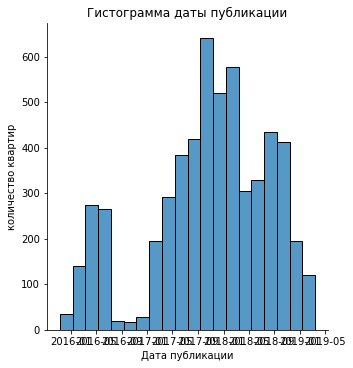

In [23]:
data['first_day_exposition'] = data['first_day_exposition'].dt.to_period('M').dt.to_timestamp()
sns.displot(good_data['first_day_exposition'], kde=False, bins=20)
plt.title('Гистограмма даты публикации')
plt.xlabel('Дата публикации')
plt.ylabel('количество квартир')
plt.show()

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> Подписи оси х скучковались. Можно либо увеличить масштаб графика, либо поменять ротацию у подписей: 
        
        https://stackoverflow.com/questions/43152502/how-can-i-rotate-xticklabels-in-matplotlib-so-that-the-spacing-between-each-xtic

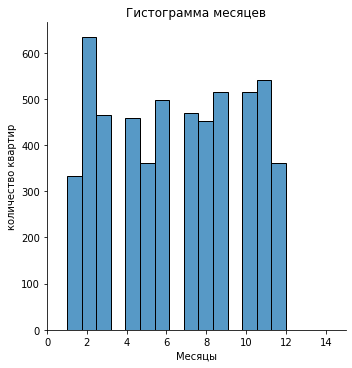

In [24]:
sns.displot(good_data['month'], kde=False, bins=15)
plt.xlim(0, 15)
plt.title('Гистограмма месяцев')
plt.xlabel('Месяцы')
plt.ylabel('количество квартир')
plt.show()
 

День недели и месяц публикации объявления не играют значимой роли на стоимость, по которой объект недвижимости будет продан


[2018 2017 2016 2015 2019]


<AxesSubplot:>

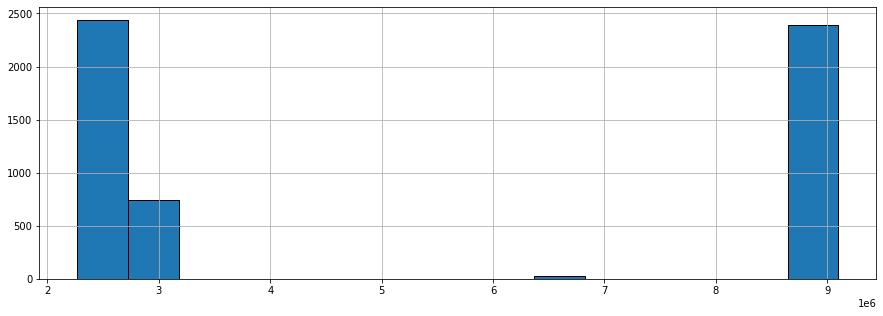

In [25]:
data['year'].fillna(0)
print(good_data['year'].unique())
data.loc[good_data['year'], 'last_price'].hist(bins=15, figsize=(15,5), ec='black')
#data.plot(x=data['year'], y=data['last_price'], style='o-', grid=True, figsize=(10, 3))
#plt.title('График по годам')
#plt.xlabel('год')
#plt.ylabel('цены')
#plt.show()

Исследование показало, что квартиры продавались по более высоким ценам в 2014 и 2019 годах, но это объясняется, скорее всего, макроэкономической ситуацией.

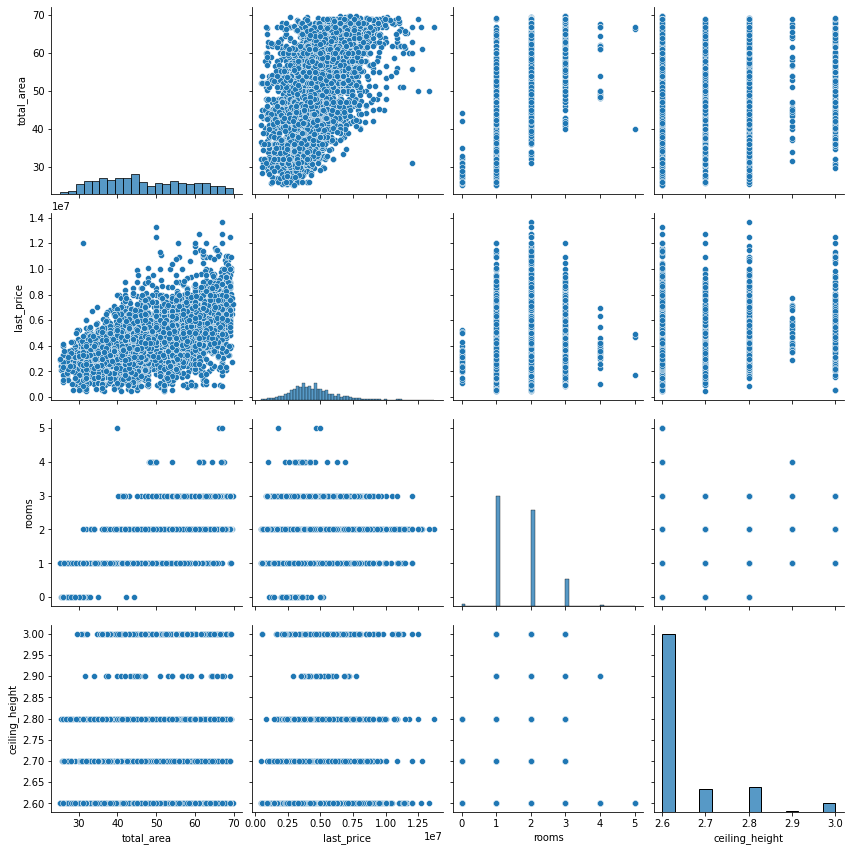

In [26]:
_ = sns.pairplot(good_data, 
                 vars=['total_area', 'last_price', 'rooms', 'ceiling_height'],
                 height=3)



Для наглядности выбрала 10 населённых пунктов с наибольшим числом объявлений и на них посчитала среднюю цену квадратного метра, чтобы показать, где самая высокая, а где самая низкая стоимости.

In [27]:
display(data['locality_name'].value_counts().head(10))
display(good_data['locality_name'].value_counts().head(10))
print('средняя цена м2 в Санкт-Петербурге', good_data.query('locality_name == "Санкт-Петербург"')['price_of_metre'].mean())
print('средняя цена м2 в посёлке Шушары', good_data.query('locality_name == "посёлок Шушары"')['price_of_metre'].mean())
print('средняя цена м2 в Всеволожске', good_data.query('locality_name == "Всеволожск"')['price_of_metre'].mean())
print('средняя цена м2 в Пушкине', good_data.query('locality_name == "Пушкин"')['price_of_metre'].mean())
print('средняя цена м2 в Колпино', good_data.query('locality_name == "Колпино"')['price_of_metre'].mean())
print('средняя цена м2 в посёлке Мурино', good_data.query('locality_name == "посёлок Мурино"')['price_of_metre'].mean())
print('средняя цена м2 в посёлке Парголово', good_data.query('locality_name == "посёлок Парголово"')['price_of_metre'].mean())
print('средняя цена м2 в Гатчине', good_data.query('locality_name == "Гатчина"')['price_of_metre'].mean())
print('средняя цена м2 в деревне Кудрово', good_data.query('locality_name == "деревня Кудрово"')['price_of_metre'].mean())
print('средняя цена м2 в Выборге', good_data.query('locality_name == "Выборг"')['price_of_metre'].mean())



Санкт-Петербург      15721
поселок Мурино         556
поселок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
поселок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

Санкт-Петербург      3596
поселок Мурино        214
поселок Шушары        143
Всеволожск             98
поселок Парголово      97
деревня Кудрово        97
Гатчина                81
Пушкин                 76
Колпино                70
Кудрово                66
Name: locality_name, dtype: int64

средняя цена м2 в Санкт-Петербурге 107076.6362625139
средняя цена м2 в посёлке Шушары nan
средняя цена м2 в Всеволожске 69254.60204081633
средняя цена м2 в Пушкине 99279.03947368421
средняя цена м2 в Колпино 76736.31428571428
средняя цена м2 в посёлке Мурино nan
средняя цена м2 в посёлке Парголово nan
средняя цена м2 в Гатчине 67853.02469135802
средняя цена м2 в деревне Кудрово 92195.42268041238
средняя цена м2 в Выборге 55845.372881355936


<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> Можно было сделать проще: взять топ-10 локаций по кол-ву объявлений и для этих объявлений найти среднее цены квадратного метраю Уберем хардкод и сразу визуализируем данные - так их проще воспринять
            
    top_locality = data_filtered['locality_name'].value_counts().sort_values(ascending=False).head(10)
    (data_filtered
    .query('locality_name in @top_locality.index')
    .pivot_table(index='locality_name', values='price_per_area', aggfunc='median')
    .sort_values('price_per_area')
    .plot(kind='bar')

In [28]:
top_locality = good_data['locality_name'].value_counts().sort_values(ascending=False).head(10)
#top_locality = top_locality.query('locality_name in @top_locality.index')
#sorted_data = top_locality.pivot_table(index='locality_name', values='price_per_area', aggfunc='median')
#print(sorted_data.sort_values('price_per_area'))
#sorted_data.plot(kind='bar')
#код не сработал, выдал ошибку, что к Series не применяется метод .query, возможно, я не правильно поняла, как надо сделать

Вывод: Лидеры по средней цене квадратного метра: Санкт-Петербург, Пушкин, деревня Кудрово и поселок Парголово.
Однако в среднем дешевле всего квадратные метры в Выборге и Всеволожске.
Если в данные не вкралась ошибка, то скорее всего в деревне Кудрово и в поселке Парголово построены элитные коттеджи, которые дают такую высокую цену, что она больше, чем в небольших городах.

Анализ влияния удаленности от центра города Санкт-Петербурга и выделение центральной зоны

<AxesSubplot:>

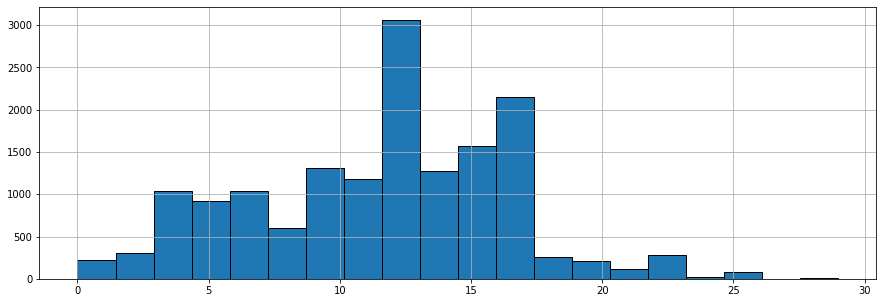

In [29]:
data.loc[(data['locality_name'] == 'Санкт-Петербург'), 'cityCenters_nearest'].sort_values().head(60)
data['cityCenters_nearest'].fillna(0)
data['citycenters_km'] = round(data['cityCenters_nearest'] / 1000)
#data['citycenters_km'] = data['cityCenters_nearest'] / 1000
#data['citycenters_km']=data.citycenters_km.convert_objects(convert_numeric=True)
#data.info()
spb_center = data.loc[(data['locality_name'] == 'Санкт-Петербург') & (data['citycenters_km'].notna()), 'citycenters_km'].apply(round)
spb_center.hist(figsize=(15,5), ec='black', bins=20)



,last_price,price_of_metre
citycenters_km,,
0.0,17900000,172619.0
1.0,11395000,128485.0
2.0,10000000,123035.5
3.0,8409000,108469.5
4.0,9200000,117952.5
5.0,9500000,127093.5
6.0,8900000,131835.0
7.0,7800000,127017.0
8.0,7450000,122945.0


array([[<AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'price_of_metre'}>]], dtype=object)

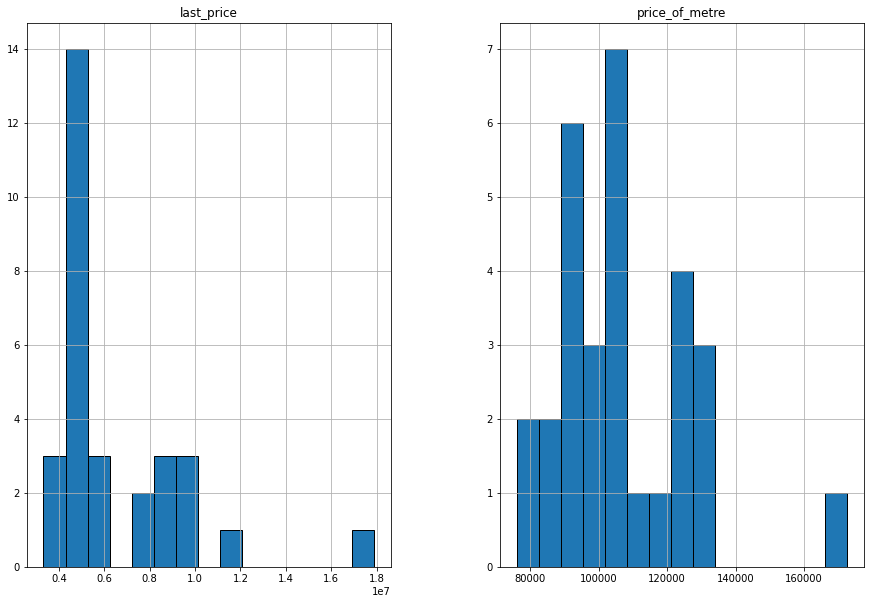

In [30]:
spb_data = data.query('locality_name == "Санкт-Петербург"')
spb_center_nearest = spb_data.pivot_table(index=data['citycenters_km'], values=['price_of_metre', 'last_price'], aggfunc='median')
display(spb_center_nearest.head(50))
#display(spb_center_nearest.tail(50)) 
spb_center_nearest.hist(figsize=(15,10), ec='black', bins=15)


Вывод: По таблице видно, что самые дорогие квартиры располагаются в пределах до 2 км, следующий блок квартир с 3 до 6 км, который можно назвать центром, а также есть третья категория, почти центр, в которую попадают квартиры с 6 до 8 км от центра. При этом в пределах города и в области тоже есть районы, где квартиры дороже, чем везде. 

<AxesSubplot:>

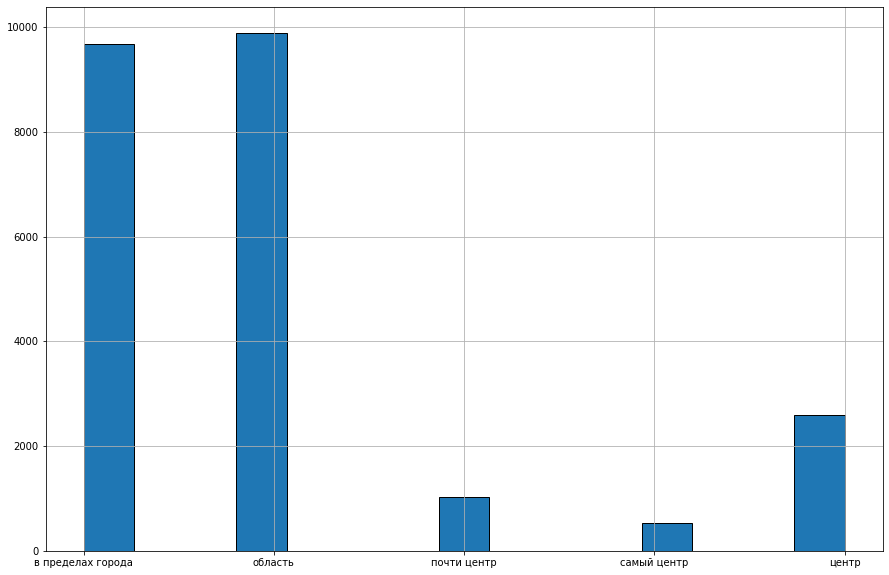

In [31]:
def city_center (row):
    if row <= 2:
        return 'самый центр'
    elif row <= 6:
        return 'центр'
    elif row <= 8:
        return 'почти центр'
    elif row < 17:
        return 'в пределах города'
    else:
        return 'область'
data['center_category'] = data['citycenters_km'].apply(city_center)
data['center_category'].hist(figsize=(15,10), ec='black', bins=15)

Анализ параметров, влияющих на продажи квартир в центре

In [32]:
data_analysis = data.drop(['locality_name','airports_nearest', 'month', 'year', 'is_apartment', 'days_exposition', 'total_images', 'living_total', 'kitchen_total', 'open_plan', 'studio'], axis = 1)
data_spb_center = data_analysis.loc[data_analysis['cityCenters_nearest'] < 8000]
#data_spb_center.loc[:, 'citycenters_km'] = data_spb_center.loc[:, 'cityCenters_nearest']/1000
display(data_analysis.describe())
display(data_spb_center.describe())
good_data_analysis = good_data.drop(['locality_name','airports_nearest', 'month', 'year', 'is_apartment', 'days_exposition', 'total_images', 'living_total', 'kitchen_total', 'open_plan', 'studio'], axis = 1)
good_data_analysis.loc[good_data_analysis['cityCenters_nearest'] < 8000].describe() 

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,price_of_metre,citycenters_km
count,2.369900e+04,23699.000000,23699.000000,23699.000000,23613.000000,21796.000000,23699.000000,21421.000000,23699.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,2.369900e+04,18180.000000
mean,6.541549e+06,60.348635,2.070636,2.707540,10.673824,34.457878,5.892358,10.569754,0.591080,14191.277833,0.611408,490.804555,0.770255,517.980900,9.942169e+04,14.184818
std,1.088701e+07,35.654086,1.078405,0.990151,6.597173,22.030420,4.885249,5.905448,0.959298,8608.386210,0.802074,342.317995,0.938346,277.720643,5.030699e+04,8.616194
min,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.120000e+02,0.000000
25%,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,7.658700e+04,9.000000
50%,4.650000e+06,52.000000,2.000000,2.600000,9.000000,30.000000,4.000000,9.100000,0.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,9.500000e+04,13.000000
75%,6.800000e+06,69.900000,3.000000,2.700000,16.000000,42.300000,8.000000,12.000000,1.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,1.142620e+05,16.000000
max,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1.907500e+06,66.000000


,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,price_of_metre,citycenters_km
count,3.728000e+03,3728.000000,3728.000000,3728.000000,3721.000000,3421.000000,3728.000000,3376.000000,3728.000000,3728.000000,3728.000000,2465.000000,3728.000000,2669.000000,3.728000e+03,3728.000000
mean,1.470808e+07,92.296030,2.813841,2.926824,7.235689,53.877317,4.275751,14.425889,0.328594,4687.831009,1.025751,465.318864,1.277629,465.203072,1.442655e+05,4.672479
std,2.465597e+07,60.432224,1.454138,0.728355,3.968637,37.317012,3.060456,9.292661,0.766636,1765.009014,0.938050,305.528749,1.088473,270.366156,9.169918e+04,1.812746
min,1.600000e+06,12.000000,0.000000,2.000000,2.000000,2.000000,1.000000,2.000000,0.000000,181.000000,0.000000,9.000000,0.000000,22.000000,1.534500e+04,0.000000
25%,6.550000e+06,56.000000,2.000000,2.600000,5.000000,31.000000,2.000000,9.000000,0.000000,3585.000000,0.000000,278.000000,0.000000,228.000000,1.000000e+05,4.000000
50%,9.000000e+06,77.800000,3.000000,2.800000,6.000000,45.100000,4.000000,12.000000,0.000000,4802.000000,1.000000,436.000000,1.000000,453.000000,1.235825e+05,5.000000
75%,1.410212e+07,108.700000,3.000000,3.100000,9.000000,65.000000,5.000000,16.700000,0.000000,5946.000000,2.000000,596.000000,2.000000,667.000000,1.548390e+05,6.000000
max,7.630000e+08,900.000000,19.000000,32.000000,27.000000,409.700000,25.000000,112.000000,5.000000,7998.000000,3.000000,2295.000000,3.000000,1293.000000,1.907500e+06,8.000000


,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,price_of_metre
count,4.340000e+02,434.000000,434.000000,434.000000,434.000000,400.000000,434.000000,388.000000,434.000000,434.000000,434.000000,261.000000,434.000000,310.000000,434.000000
mean,6.357806e+06,50.834562,1.755760,2.707834,7.891705,27.992500,4.313364,10.198454,0.361751,5208.278802,0.873272,520.712644,1.195853,525.512903,126704.559908
std,1.885603e+06,10.750277,0.699902,0.152374,4.274072,9.485678,3.227832,3.808375,0.719579,1636.616020,0.875678,351.862875,1.026612,258.902347,33576.484717
min,2.750000e+06,25.200000,0.000000,2.600000,2.000000,2.000000,1.000000,2.000000,0.000000,820.000000,0.000000,20.000000,0.000000,33.000000,63525.000000
25%,5.000000e+06,43.000000,1.000000,2.600000,5.000000,19.675000,2.000000,7.500000,0.000000,4160.250000,0.000000,320.000000,0.000000,330.000000,103380.750000
50%,5.990000e+06,50.000000,2.000000,2.600000,6.000000,28.000000,3.000000,9.450000,0.000000,5247.500000,1.000000,462.000000,1.000000,509.500000,122222.000000
75%,7.499750e+06,60.000000,2.000000,2.800000,10.000000,35.300000,5.000000,12.000000,0.000000,6462.000000,1.000000,630.000000,2.000000,723.750000,143473.000000
max,1.330000e+07,69.700000,4.000000,3.000000,25.000000,54.900000,16.000000,27.000000,5.000000,7982.000000,3.000000,2295.000000,3.000000,1199.000000,387097.000000


Вывод: В центре Санкт-Петербурга для чистых данных 2-х комнатная квартира, средняя стоимость которой около 6,5 миллионов, средняя площадь 50 м2, а высота потолка 2,7. Если смотреть на медиану, то данные будут немного отличаться: 2-х комнатная квартира, стоимостью 6 миллионов, площадью 50 м2, с высотой потолков 2,6. На данных с выбросами 3-х комнатная квартира, со средней стоимостью 14,7 миллионов, средняя площадь 92, высота потолка около 3 м. Если смотреть медиану, то 3-х комнатная квартира, стоимостью 9 миллионов, площадью около 78 м., высотой потолка 2,8. При сравнении выборки из центра Санкт-Петербурга на данных без исключений и на чистых данных показывает, что многие выбросы, которые мы исключили, происходили в том числе из центра Санкт-Петербурга. И исключение их делает выборку из центра менее характерной и разнообразной. Поэтому для следующего задания проверим данные для центра на обеих выборках.
Таким образом, цена квартиры в центре Петербурга на чистых данных отличается только на медиане, хотя остальные показатели, такие как высота потолка и количество комнат такие же. На данных с выбросами, различия существенны.

<AxesSubplot:>

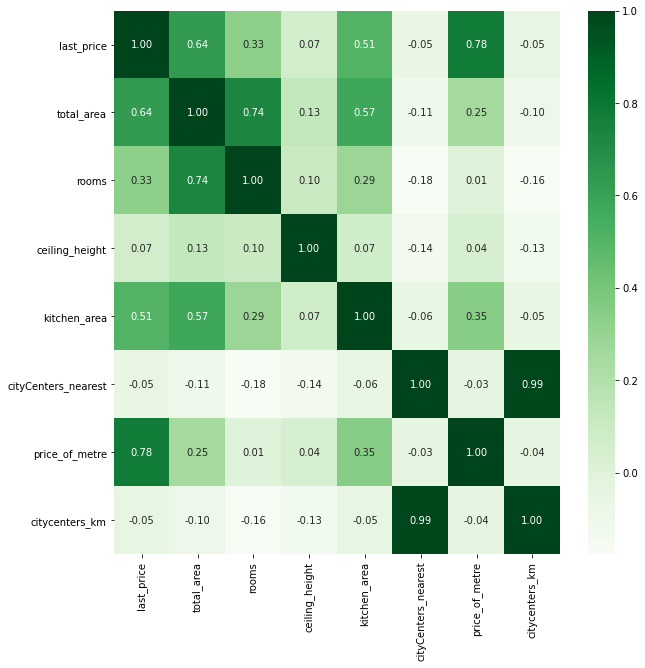

In [33]:
data_control = data.drop(['locality_name','airports_nearest', 'month', 'year', 'kitchen_total', 'living_total', 'is_apartment', 'days_exposition', 'ponds_around3000', 'ponds_nearest', 'floors_total', 'first_day_exposition', 'total_images', 'living_area', 'parks_around3000', 'floor', 'parks_nearest', 'balcony', 'open_plan', 'studio'], axis = 1)
plt.figure(figsize=(10,10))
sns.heatmap(data_control.loc[data_control['cityCenters_nearest'] < 8000].corr(), annot=True, cmap="Greens", fmt='.2f')

<AxesSubplot:>

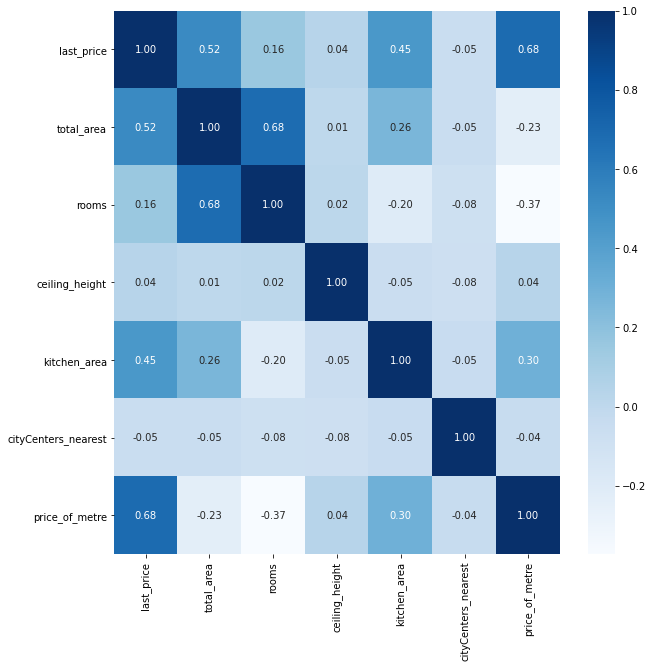

In [34]:
data_control = good_data.drop(['locality_name','airports_nearest', 'month', 'year', 'kitchen_total', 'living_total', 'is_apartment', 'days_exposition', 'ponds_around3000', 'ponds_nearest', 'floors_total', 'first_day_exposition', 'total_images', 'living_area', 'parks_around3000', 'floor', 'parks_nearest', 'balcony', 'open_plan', 'studio'], axis = 1)
plt.figure(figsize=(10,10))
sns.heatmap(data_control.loc[data_control['cityCenters_nearest'] < 8000].corr(), annot=True, cmap="Blues", fmt='.2f')

Сравнение двух матриц по центру Санкт-Петербурга показало, что на чистых данных уменьшается корреляция площади кухни, общей площади и цены за метр. И существенно уменьшается корреляция с числом комнат.

<AxesSubplot:>

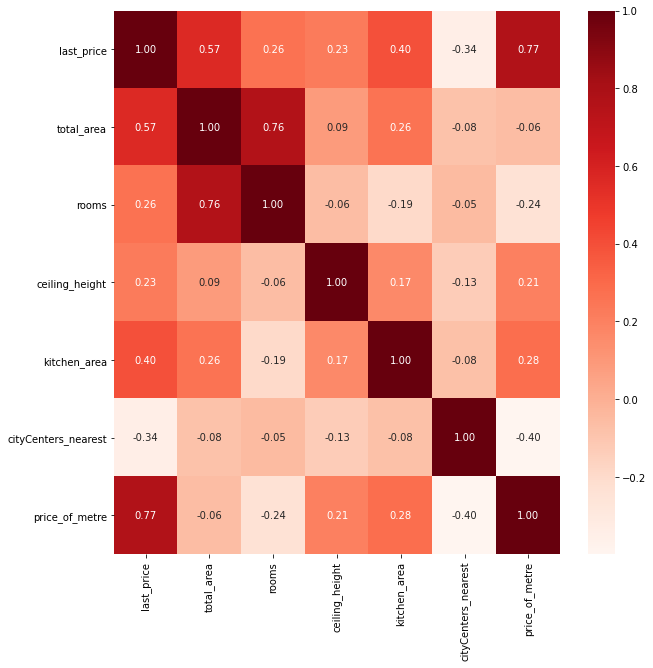

In [35]:
plt.figure(figsize=(10,10))
sns.heatmap(data_control.corr(), annot=True, cmap="Reds", fmt='.2f')

В центре Санкт-Петербурга в большей степени влияет на цену количество комнат.

## Общий вывод
В данных много пропусков, некоторые из них, как количество балконов, можно заменить нулями, другие потребовали большей обработки. 

ceiling_height: было пропущено 38,8% значений, при этом часть значений были введены вручную с ошибкой (27 м вместо 2,7 м и т.д.), заменили медианой.

floors_total: пропущено 0,4% значений. Данный признак будет использоваться в анализе, при этом достаточно точно заменить пропущенные значения не представляется возможным, поэтому все строки с пропущенными значениями удалены.

living_area и kitchen_area: пропущено 7,9% и 9,4% значений соответственно, в случае, kitchen_area заменили медианой.

balcony: пропущено 48,6% значений. Предполагается, что отсутствие числа балконов свидетельствует о том, что балкона нет, заменили на ноль.

locality_name: пропущено 0,2% значений. Все строки с пропущенными значениями удалены, так как этот признак будет использоваться при дальнейшем анализе.

cityCenters_nearest: пропущено 23,3% значений. При этом из всех квартир Санкт-Петербурга отсутствует информация по расстоянию до центра для 0,4% квартир, поэтому можно оставить этот показатель без изменений.

is_apartment все пропуски можно было бы заполнить False, так как скорее всего не заполнили эту графу те люди, которые не считали свою квартиру апартаментами, поэтому и пропустили. Однако, пропусков очень много, 88,3%, а в исследовании не исспользуется этот показатель, можно оставить так.

airports_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest: пропущенные значения в этих признаках оставим без изменений, так как они не будут использованы в текущем исследовании.

days_exposition: пропущено 13,5% значений. Все пропущенные значения заменить на медиану - не самое лучшее решение, так как причина не заполнения этого значения неясна, возможно, квартира до сих пор не продана, а попала в эту базу.

Данные были приведены в соотвествующий вид для дальнейшего анализа.

Выбивающиеся значения характеристик квартир из представленного набора данных:
7-комнатная квартира или больше
площадью более 114,3 кв. м
с потолками менее 2,25 м или более 3,05 м
по цене более 11,9 млн рублей
проданная за 232 дня или более

Результаты анализа таковы:
Факторы, влияющие на стоимость квартиры. Наиболее сильная корреляция наблюдается между площадью квартиры и ее стоимостью (коэфф. корреляции 0,65). Расстояние до центра города влияет на стоимость квартиры, но обратно пропорционально и не так сильно (коэфф. корреляции -0,31). 
Стоимость квартиры зависит от числа комнат: чем их больше, тем квартира дороже.
Но это верно, пока число комнат не превышает четырех: 5- или 6-комнатные квартиры могут быть проданы дешевле 4-комнатных, и вызвано это скорее всего отсутствием спроса.

Самые дорогие квартиры располагаются в пределах до 2 км, следующий блок квартир с 3 до 6 км, который можно назвать центром, а также есть третья категория, почти центр, в которую попадают квартиры с 6 до 8 км от центра. При этом в пределах города и в области тоже есть районы, где квартиры дороже, чем везде. 

В центре Санкт-Петербурга для чистых данных 2-х комнатная квартира, средняя стоимость которой около 6,5 миллионов, средняя площадь 50 м2, а высота потолка 2,7. Если смотреть на медиану, то данные будут немного отличаться: 2-х комнатная квартира, стоимостью 6 миллионов, площадью 50 м2, с высотой потолков 2,6. На данных с выбросами 3-х комнатная квартира, со средней стоимостью 14,7 миллионов, средняя площадь 92, высота потолка около 3 м. Если смотреть медиану, то 3-х комнатная квартира, стоимостью 9 миллионов, площадью около 78 м., высотой потолка 2,8. При сравнении выборки из центра Санкт-Петербурга на данных без исключений и на чистых данных показывает, что многие выбросы, которые мы исключили, происходили в том числе из центра Санкт-Петербурга. И исключение их делает выборку из центра менее характерной и разнообразной. Поэтому для следующего задания проверим данные для центра на обеих выборках.

Таким образом, цена квартиры в центре Петербурга на чистых данных отличается только на медиане, хотя остальные показатели, такие как высота потолка и количество комнат такие же. На данных с выбросами, различия существенны.

Сравнение двух матриц, квартир в центре Санкт-Петербурга и всей подборки, показало, что на цену квартиры больше всего влияют общая площадь, жилая площадь, число комнат, размер кухни, в меньшей степени высота потолка, хотя количество пропусков в последних показателях существенно и на них нельзя ориентироваться.